# Free Fall Program

First we import useful modules

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style # These two lines are needed to visualize plots in dark backgrounds
style.use('dark_background') # If you don't use dark backgrounds, comment out this line

In the following block we initialize the main physical proprties of the simulations, namely the initial conditions of the system (initial height and initial velocity), and the magnitude of the constant acceleration. In the following we will assume MKS units. The following program evolves both position and velocity as a function of time using ODE solvers. 

Following the book's setup, we collect these two degrees of freedom (dof) into a single list with two components: the first is the height of the ball (position along y axis, in meters), the second is the velocity of the ball (the component along the y axis, in meters/seconds).

In [260]:
dof0=np.array([0., 10.]) # here we somehow follow the book's setup, dof[0] is the height in meters, dof[1] is the y component of the velocity
a=-9.8 # gravitational acceleration 

Since the free fall problem can be solved analytically, we use the analytic result to calculate the total time for the ball to reach the ground.

In [246]:
time_fall=(-dof0[1]-np.sqrt(dof0[1]**2-2*a*dof0[0]))/a

Using Numpy we can also calculate the whole trajectory as a function of time at regular time intervals. We can then plot $y(t)$ using Matplotlib.

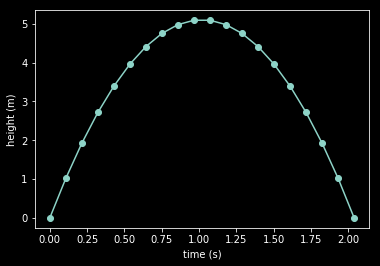

In [261]:
nt=20
times_analytic=np.linspace(0.,time_fall,nt)
heights_analytic=dof0[0]+dof0[1]*times_analytic+0.5*a*times_analytic**2
plt.plot(times_analytic,heights_analytic,'o-')
plt.xlabel("time (s)")
plt.ylabel("height (m)")
plt.show()

And we can do the same for the velocity of the ball (the second degree of freedom of the system)

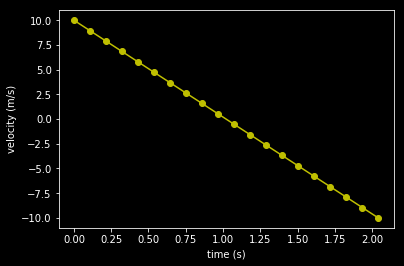

In [262]:
velocity_analytic=dof0[1]+a*times_analytic
plt.plot(times_analytic,velocity_analytic,'o-y')
plt.xlabel("time (s)")
plt.ylabel("velocity (m/s)")
plt.show()

While analytical solutions are great, we want to be able to solve these problems numerically. There are different algorithms to integrate ODEs, the most basic one being the Euler methos, which is a first order approach: the algorithm is correct to first order, with errors of second order in the timestep. This translates to the fact that motions that are linear in time are solved exactly, while non-linear motions are approximated.

In [264]:
def Euler(diffeq,dof,h):
    """"""
    ddofdt=diffeq(dof) # get (d/dt)dof at time t
    return dof + h*ddofdt

The above algorithm requires an additional function that provides the derivatives of the degrees of freedom with respect to time. For the simple free fall motion, we thus need to compute the derivative of the vertical position as a function of time (i.e. the vertical velocity) and the derivative of the vertical velocity as a function of time (i.e. the constant acceleration due to gravity)

In [265]:
def freefall(dof):
    """"""
    ddofdt=np.zeros(2)
    ddofdt[0] = dof[1]
    ddofdt[1] = a # This is a global variable defined at the beginning, you can hardcode a value here instead
    return ddofdt

With the two functions above, we can now integrate the free fall ODEs one step at a time. The size of the timestep will control the accuracy of the integration (as the error is proportional to the square of the timestep). NOTE that contrary to the analytic results, that were computed all at once using numpy arrays, we can only implement this algorithm using a loop in a sequential fashion. This is because, in order to get the dof at a new time we need to know the dof at the previous time. 

In [266]:
dt = 0.001 # This controls the accuracy of the algorithm
times_Euler=[0.] # Setup a container to store the times along the trajectory
heights_Euler=[y0[0]] # Setup a container to store the vertical position along the trajectory
dof=dof0.copy() # we copy the initial conditions, as we don't want to overwrite them, we may use them in the following. 
# note that in the above we use the array.copy() method, as the = operator has a different meaning for arrays
while True: # this is an infinite loop, make sure you break it somewhere
    dof=Euler(freefall,dof,dt)
    if dof[0] < 0. : break # when the ball reaches the floor, exit the loop
    heights_Euler.append(dof[0]) # otherwise, save the position of the ball
    times_Euler.append(times_Euler[-1]+dt) # and the corresponding time

ASSIGNMENT 1: In the following we want to compute the difference between the height of the ball at the end of the trajectory with respect to the analytc result at the same time. Note that, while the error should go down as $dt^2$, the number of steps to reach the floor increases linearly with $dt$.

In [259]:
delta_height=heights_Euler[-1]-(dof0[0]+dof0[1]*times_Euler[-1]+0.5*a*times_Euler[-1]**2)
print(dt,delta_height)

0.001 0.010000899998617427


We can visually compare the Euler trajectory with the analytic solution

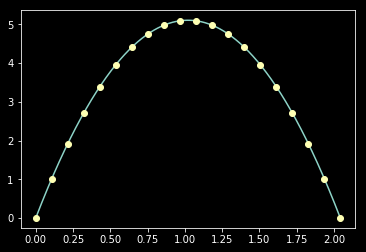

In [267]:
plt.plot(times_Euler,heights_Euler,'-')
plt.plot(times_analytic,heights_analytic,'o ')
plt.plot()
plt.show()

There are better algorithms to integrate ODEs. In particular a common second order algorithm is the Runge-Kutta method, which uses the derivates at a half step, estimated using Euler algorithm

In [269]:
def RK2(diffeq,dof,h):
    """"""
    k1=h*diffeq(dof)
    k2=h*diffeq(dof+0.5*k1)
    return dof+k2

We can repeat the simulation as before, by just changing the algorithm from Euler to RK2

In [270]:
dt = 0.1
times_RK2=[0.]
heights_RK2=[dof0[0]]
dof = dof0.copy()
while True:
    dof=RK2(freefall,dof,dt)
    if dof[0] < 0. : break
    times_RK2.append(times_RK2[-1]+dt)
    heights_RK2.append(dof[0])

As the RK2 method is second order, its error decreases as $dt^3$ and it is exact for motions that are second order in time (such as the free fall).

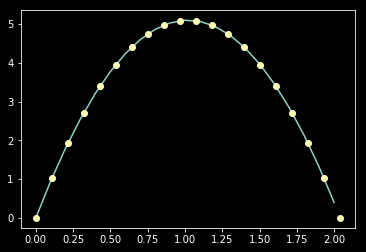

In [272]:
plt.plot(times_RK2,heights_RK2,'-')
plt.plot(times_analytic,heights_analytic,'o ')
plt.plot()
plt.show()